In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df=pd.read_csv('../data/vehicles.csv')

In [5]:
# Crear un nuevo DataFrame con una muestra aleatoria de 100 filas
df2 = df.sample(n=100, random_state=42)  # random_state para reproducibilidad


In [6]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df2.head()

Primeras filas del dataset:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
100905,7315883828,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00s0s_lRS7etJoVE...,Carvana is the safer way to buy a car During t...,NaN,fl,28.0400,-81.9600,2021-05-02T15:31:06-0400
143835,7314599643,https://quadcities.craigslist.org/ctd/d/waterl...,"quad cities, IA/IL",https://quadcities.craigslist.org,27995,2006.0,chevrolet,corvette,good,8 cylinders,...,NaN,convertible,black,https://images.craigslist.org/00101_aa4DyXpKu0...,2006 *** Chevrolet Corvette Convertible Conver...,NaN,il,42.4778,-92.3661,2021-04-29T18:46:35-0500
20235,7308399808,https://littlerock.craigslist.org/ctd/d/clinto...,little rock,https://littlerock.craigslist.org,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,...,NaN,convertible,NaN,https://images.craigslist.org/00A0A_kJsL7mVMCg...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.4018,-93.7850,2021-04-17T14:01:33-0500
300734,7312663807,https://wheeling.craigslist.org/ctd/d/follansb...,northern panhandle,https://wheeling.craigslist.org,14000,2013.0,bmw,328i,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00K0K_2oCjTKrjd9...,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",NaN,oh,40.3203,-80.6250,2021-04-25T23:53:42-0400
316249,7315368523,https://eugene.craigslist.org/ctd/d/cottage-gr...,eugene,https://eugene.craigslist.org,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00H0H_3hFsa4lTxO...,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,NaN,or,43.7839,-123.0529,2021-05-01T10:04:24-0700


In [7]:
# Información general del dataset
print("\nInformación del dataset:")
df2.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 100905 to 82791
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   url           100 non-null    object 
 2   region        100 non-null    object 
 3   region_url    100 non-null    object 
 4   price         100 non-null    int64  
 5   year          100 non-null    float64
 6   manufacturer  97 non-null     object 
 7   model         97 non-null     object 
 8   condition     67 non-null     object 
 9   cylinders     63 non-null     object 
 10  fuel          98 non-null     object 
 11  odometer      97 non-null     float64
 12  title_status  96 non-null     object 
 13  transmission  100 non-null    object 
 14  VIN           64 non-null     object 
 15  drive         69 non-null     object 
 16  size          28 non-null     object 
 17  type          79 non-null     object 
 18  pa

In [8]:
# Estadísticas descriptivas iniciales
print("\nEstadísticas descriptivas iniciales:")
df2.describe()


Estadísticas descriptivas iniciales:


,id,price,year,odometer,county,lat,long
count,1.000000e+02,100.000000,100.000000,97.000000,0.0,98.000000,98.000000
mean,7.311664e+09,18752.290000,2009.810000,89245.979381,NaN,38.339058,-93.334324
std,4.215136e+06,16004.432737,13.205214,63078.100005,NaN,5.188496,18.462008
min,7.301711e+09,0.000000,1953.000000,45.000000,NaN,20.744100,-156.447500
25%,7.308827e+09,6523.750000,2008.750000,38123.000000,NaN,35.467383,-111.897826
50%,7.312505e+09,15895.000000,2014.000000,79631.000000,NaN,38.726720,-87.327813
75%,7.315333e+09,27991.250000,2017.000000,128558.000000,NaN,42.273564,-78.707531
max,7.316998e+09,85900.000000,2020.000000,372000.000000,NaN,48.753500,-71.304600


In [9]:
# Identificar duplicados
duplicados = df2.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 100905 to 82791
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   url           100 non-null    object 
 2   region        100 non-null    object 
 3   region_url    100 non-null    object 
 4   price         100 non-null    int64  
 5   year          100 non-null    float64
 6   manufacturer  97 non-null     object 
 7   model         97 non-null     object 
 8   condition     67 non-null     object 
 9   cylinders     63 non-null     object 
 10  fuel          98 non-null     object 
 11  odometer      97 non-null     float64
 12  title_status  96 non-null     object 
 13  transmission  100 non-null    object 
 14  VIN           64 non-null     object 
 15  drive         69 non-null     object 
 16  size          28 non-null     object 
 17  type          79 non-null     object 
 18  paint_color   77 non-null   

In [11]:
df2['year'] = df2['year'].astype('int64')
df2['odometer'] = df2['odometer'].fillna(0).astype('int64')
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
for col in categorical_columns:
    df2[col] = df2[col].astype('category')
df2 = df2.drop(columns=['county'])
print(df2.dtypes)

id                 int64
url               object
region          category
region_url        object
price              int64
year               int64
manufacturer    category
model           category
condition       category
cylinders         object
fuel            category
odometer           int64
title_status    category
transmission    category
VIN               object
drive           category
size            category
type            category
paint_color     category
image_url         object
description       object
state           category
lat              float64
long             float64
posting_date      object
dtype: object


In [12]:
columnas_categoricas = ['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition',
                        'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 
                        'size', 'type', 'paint_color', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date']
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}':")
    print(df2[columna].unique())
    print("\n")

Valores únicos en 'id':
[7315883828 7314599643 7308399808 7312663807 7315368523 7309863303
 7315163492 7304728134 7316972938 7303836633 7314062043 7307384497
 7308249312 7315155963 7316224599 7316060352 7303028736 7307149592
 7312323150 7309458405 7311552010 7309195488 7314592459 7310936846
 7307360366 7314561692 7303005018 7316698065 7316263687 7316216387
 7316487991 7307912091 7311081216 7313334568 7314650643 7306721818
 7309264044 7312572349 7315829819 7310991832 7313347487 7315542875
 7315108049 7316385563 7316502336 7309193084 7308901436 7309458468
 7310750580 7315862943 7304207392 7315053714 7311424569 7314286873
 7316410658 7308603116 7311766824 7305974928 7316928621 7315588013
 7310314006 7316145049 7313101856 7310509370 7314025594 7311383130
 7313573284 7303345673 7302586697 7308554130 7316284619 7305782497
 7306615432 7315321548 7312437714 7316715731 7313874119 7316997665
 7316963014 7314442374 7307601706 7301711446 7312017921 7314072902
 7313472825 7313039089 7311367851 7311

In [13]:
region_map = {
    'quad cities, IA/IL': 'Quad Cities, IA/IL',  # Ejemplo de corrección de formato
    'northern panhandle': 'Northern Panhandle, WV',  # Expansión de nombre
    'central IL': 'Central Illinois',  # Ejemplo de corrección
    'chicago and suburbs': 'Chicago, IL',  # Simplificación de nombre
    'dfw': 'Dallas-Fort Worth, TX',  # Expansión de abreviación
    # Agrega más mapeos según lo necesites
}

# Aplicar la estandarización en la columna 'region'
df2['region'] = df2['region'].map(region_map).fillna(df2['region'])

# Mostrar los cambios
print(df2['region'].unique())

['lakeland' 'Quad Cities, IA/IL' 'little rock' 'Northern Panhandle, WV'
 'eugene' 'waterloo / cedar falls' 'jackson' 'albany' 'charlotte'
 'columbus' 'appleton-oshkosh-FDL' 'twin falls' 'knoxville' 'houston'
 'ft myers / SW florida' 'hawaii' 'erie' 'fort collins / north CO'
 'monterey bay' 'philadelphia' 'new haven' 'ventura county' 'buffalo'
 'pittsburgh' 'atlanta' 'cape cod / islands' 'nashville' 'kalispell'
 'plattsburgh-adirondacks' 'new york city' 'williamsport' 'space coast'
 'south jersey' 'lake of the ozarks' 'elmira-corning' 'phoenix' 'tucson'
 'san antonio' 'syracuse' 'rochester' 'grand rapids' 'memphis'
 'fresno / madera' 'springfield' 'orlando' 'fredericksburg'
 'inland empire' 'boston' 'SF bay area' 'macon / warner robins'
 'western massachusetts' 'klamath falls' 'washington, DC' 'modesto'
 'southern maryland' 'raleigh / durham / CH' "spokane / coeur d'alene"
 'long island' 'bakersfield' 'jonesboro' 'bellingham' 'jacksonville'
 'hickory / lenoir' 'south florida' 'scranton 

In [14]:
# 1. **Escalar las características numéricas**
numerical_cols = ['price', 'year', 'odometer', 'lat', 'long']

# Inicializamos el escalador
scaler = StandardScaler()

# Aplicamos el escalado a las columnas numéricas
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

# 2. **Transformar las características categóricas**
categorical_cols = ['region', 'manufacturer', 'model', 'condition', 'fuel', 
                    'title_status', 'transmission', 'drive', 'size', 
                    'type', 'paint_color', 'state']

# Label Encoding
label_cols = ['cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Usamos LabelEncoder para las columnas que no necesitamos One-Hot Encoding
encoder = LabelEncoder()

for col in label_cols:
    df2[col] = encoder.fit_transform(df2[col])

# One-Hot Encoding
df2 = pd.get_dummies(df2, columns=['region', 'manufacturer', 'model', 'condition'], drop_first=True)

# 3. **Revisar el resultado**
print(df2.head())



                id                                                url  \
100905  7315883828  https://lakeland.craigslist.org/ctd/d/lakeland...   
143835  7314599643  https://quadcities.craigslist.org/ctd/d/waterl...   
20235   7308399808  https://littlerock.craigslist.org/ctd/d/clinto...   
300734  7312663807  https://wheeling.craigslist.org/ctd/d/follansb...   
316249  7315368523  https://eugene.craigslist.org/ctd/d/cottage-gr...   

                               region_url     price      year  cylinders  \
100905    https://lakeland.craigslist.org  1.145282  0.547225          1   
143835  https://quadcities.craigslist.org  0.580419 -0.289976          2   
20235   https://littlerock.craigslist.org  3.747169  0.395007          2   
300734    https://wheeling.craigslist.org -0.298432  0.242788          4   
316249      https://eugene.craigslist.org -1.135145  0.699443          2   

        fuel  odometer  title_status  transmission  ... model_trailblazer 4wd  \
100905     1 -0.761567 

In [15]:
print(df2.columns)


Index(['id', 'url', 'region_url', 'price', 'year', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission',
       ...
       'model_trailblazer 4wd', 'model_tucson gls',
       'model_wrangler unlimited sahara', 'model_x2 xdrive28i',
       'model_x5 xdrive35i sport utility', 'model_xc90',
       'model_yukon denali awd', 'condition_fair', 'condition_good',
       'condition_like new'],
      dtype='object', length=216)


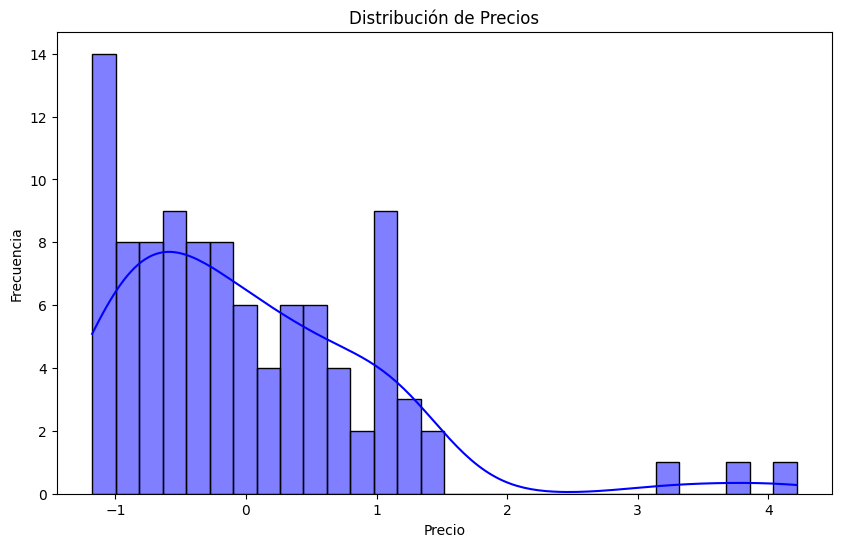

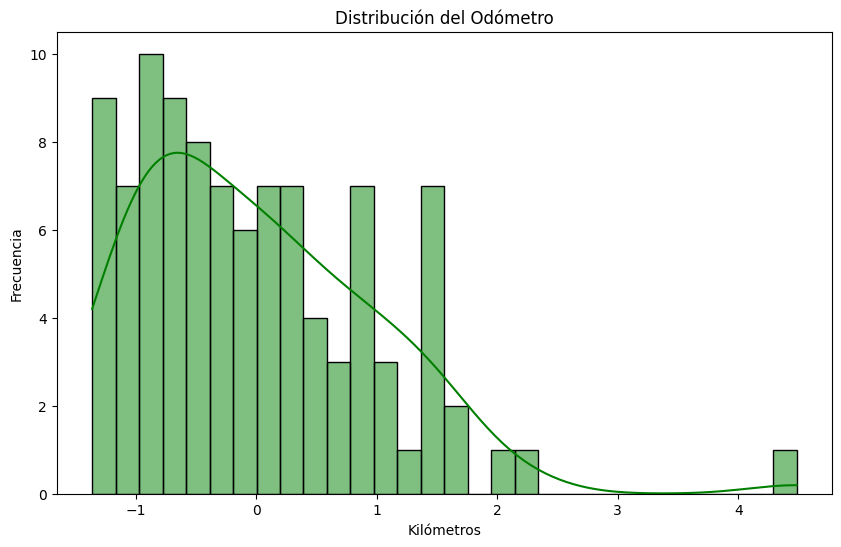

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_8360\1840024703.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df2[col], palette='Set2')
C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_8360\1840024703.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df2[col], palette='Set2')
C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_8360\1840024703.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df2[col], palette='Set2')
C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_8360\1840024703.py:24: FutureWarning: 

Passing `palet

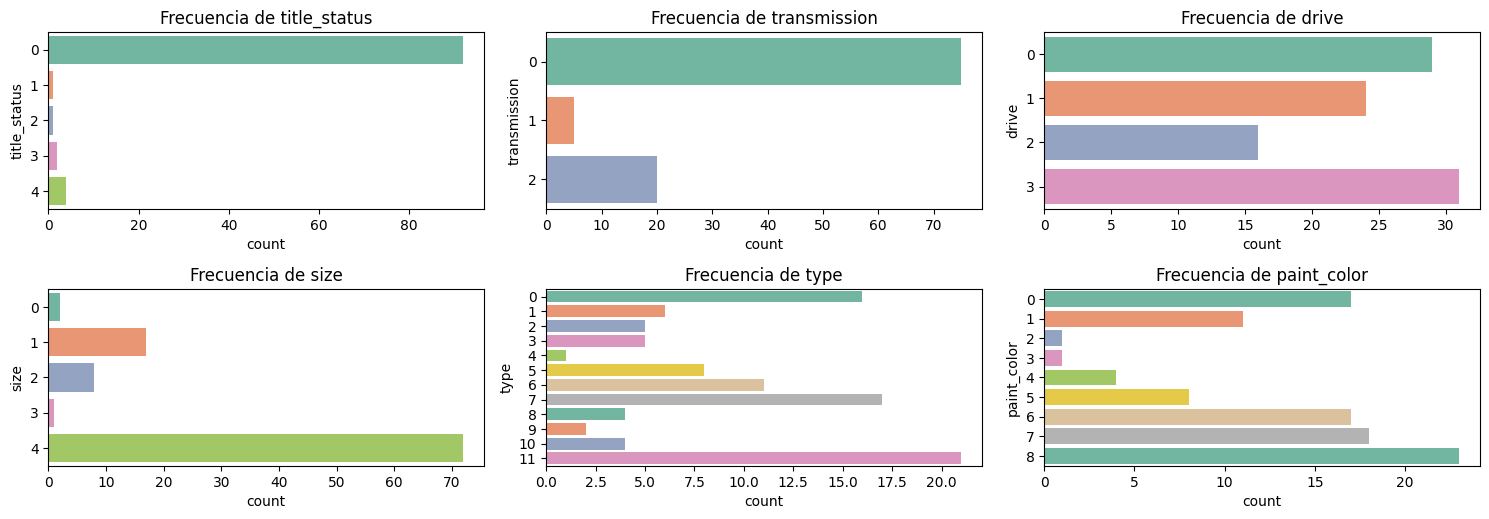

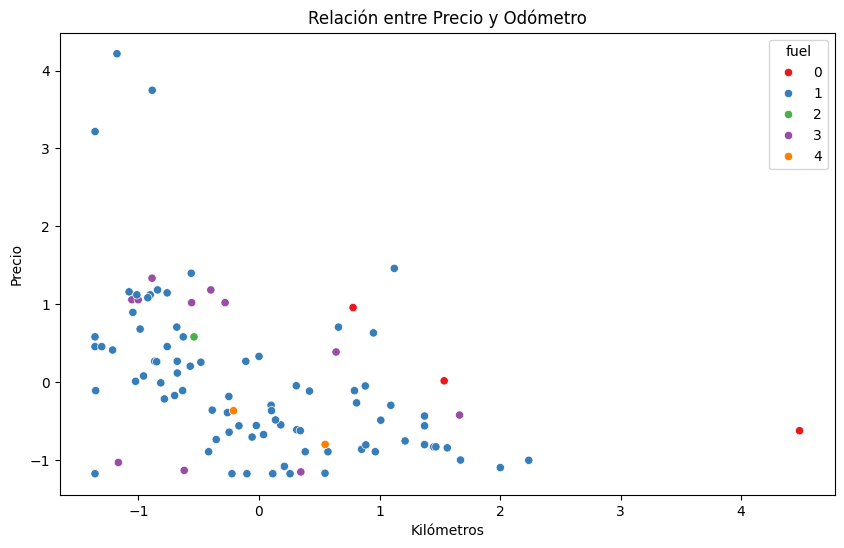

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_8360\1840024703.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition_fair', y='price', data=df2, palette='Set2')


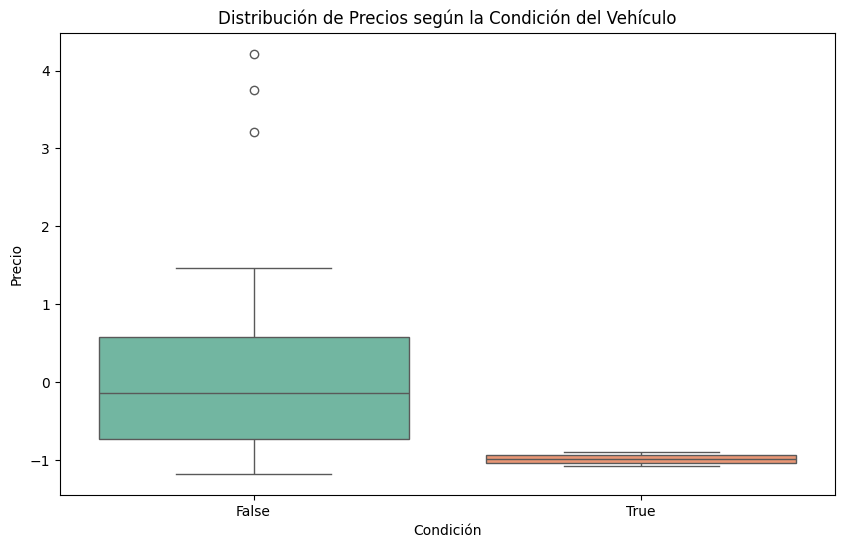

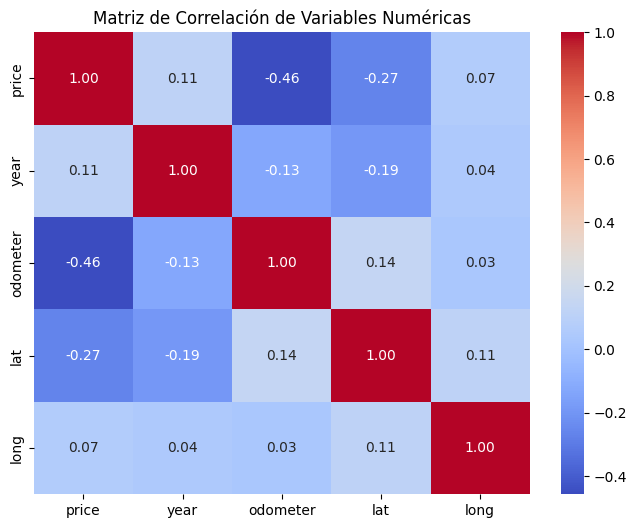

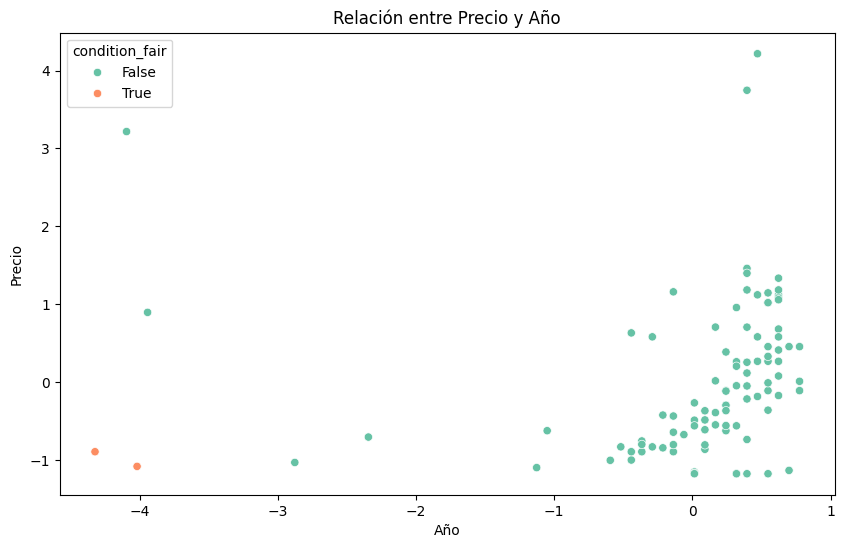

In [16]:

# 2. Visualización Univariada

# 2.1. Distribución de precios (price)
plt.figure(figsize=(10, 6))
sns.histplot(df2['price'], kde=True, color='blue', bins=30)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# 2.2. Distribución de odómetro (odometer)
plt.figure(figsize=(10, 6))
sns.histplot(df2['odometer'], kde=True, color='green', bins=30)
plt.title('Distribución del Odómetro')
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')
plt.show()

# 2.3. Contar las frecuencias de categorías
categorical_cols = ['title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Ajustamos el tamaño de los subplots
    sns.countplot(y=df2[col], palette='Set2')
    plt.title(f'Frecuencia de {col}')
plt.tight_layout()
plt.show()

# 3. Visualización Multivariada

# 3.1. Relación entre el precio y el odómetro
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df2, hue='fuel', palette='Set1')
plt.title('Relación entre Precio y Odómetro')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.show()

# 3.2. Boxplot entre el precio y la condición del vehículo
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition_fair', y='price', data=df2, palette='Set2')
plt.title('Distribución de Precios según la Condición del Vehículo')
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.show()

# 3.3. Correlación entre variables numéricas
numerical_cols = ['price', 'year', 'odometer', 'lat', 'long']
plt.figure(figsize=(8, 6))
sns.heatmap(df2[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# 3.4. Relación entre el precio y el año (gráfico de dispersión)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df2, hue='condition_fair', palette='Set2')
plt.title('Relación entre Precio y Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()


In [18]:
# Eliminar filas con valores NaN
df2_clean = df2.dropna()